# 中期作业

## 学号：....  姓名：....  专业：.... 班级：....

## Python版本：3.6.6

### 程序1：求取10000(包含)以内的所有勾股数，即a * a + b * b = c * c 
#### （条件：a,b,c均为整数，且a和b互质）

In [17]:
import csv

def isCoprime(a, b):
    '''计算两个数是否互质'''
    if a > b:
        a, b = b, a
    while a != 0:
        a, b = b % a, a
    return b == 1

def getMaxValue(maxRetry):
    '''获取用户希望搜索勾股数的范围，默认从1开始'''
    maxRetry = maxRetry
    flag = 1
    info = "请输入搜索最大值（例如 10000）："
    maxValue = -1
    while flag and maxRetry > 0:
        try:
            maxValue = int(input(info))
        except Exception as e:
            info = "输入数值格式错误，请重新输入："
        else:
            flag = 0
            break
        maxRetry -= 1
    #如果尝试三次均未成功或者输入的值非正则推出
    if flag == 1 or maxValue <= 0:
        exit(1)
    return maxValue

def saveCSV(resPath, resList, resSeparator):
    '''将结果存储指定定路径下，以csv文件格式存储'''
    with open(resPath, "w", newline="") as file:
        writer = csv.writer(file, delimiter=',')
        for row in resList:
            writer.writerow(row)

if __name__ == "__main__":
    #获取用户希望搜索的范围值，默认从1开始
    maxValue = getMaxValue(3)
    resList = []
    start = 1
    #寻找符合条件的勾股数，算法有待优化！
    for i in range(1, maxValue):
            for j in range(i + 1, maxValue, 2):
                res = i ** 2 + j ** 2
                if (res ** 0.5) > maxValue:
                    break
                elif not isCoprime(i, j) or int(res ** 0.5) != (res ** 0.5):
                    continue
                else:
                    resList.append((i, j, int(res ** 0.5)))

    saveCSV(r"e:\pythagorean.csv", resList, ",")

请输入搜索最大值（例如 10000）：10000


### 程序2：利用pandas导入数据，matplotlib绘图
#### 图1：(a, b)二维坐标点图，其中c属于(3000, 8000]
#### 图2：计算概率P(x) = count(数据集中max(a, b) <= x)/x，绘制[x, P(x)]的曲线图(x属于(0, 10000])

d:\soft\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


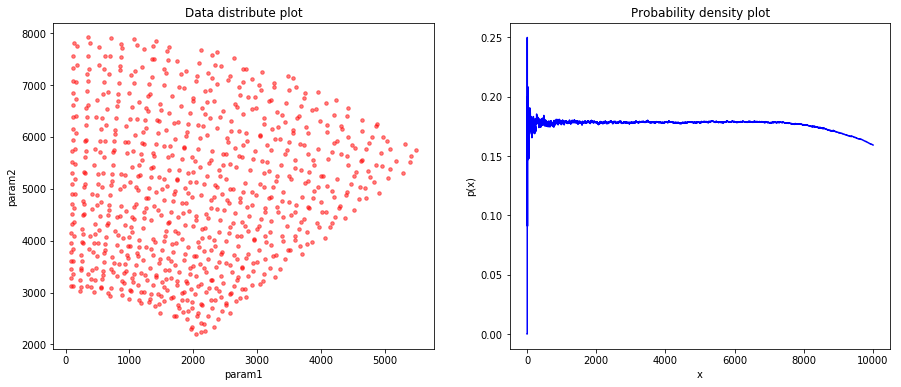

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取csv文件,DataFram
df = pd.read_csv(r"e:\pythagorean.csv", delimiter=',', header=None, names=["param1", "param2", "param3"])
# 图1
# 数据准备
data = df[df["param3"] > 3000][df["param3"] <= 8000][["param1", "param2"]]
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# 画板1上绘制散点图
ax1.scatter(x = data[["param1"]], y = data[["param2"]], s = 50, alpha=0.5, marker='.', c = 'red')
ax1.set_xlabel('param1')
ax1.set_ylabel('param2')
ax1.set_title("Data distribute plot")

# 图2
#数据准备
dataX = range(1, 10001)
dataY = df["param2"].sort_values()
p = []
for i in dataX:
    p.append((dataY[dataY <= i].count()/i))
ax2.plot(dataX, p, c = 'blue')
ax2.set_xlabel("x")
ax2.set_ylabel("P(x)")
ax2.set_title("Probability density plot")
plt.show()